# EDA of data from the records of St Andrew's Church, Burnham-on-Sea, Somerset

Information from the parish records of St Andrew's Church, Burnham-on-Sea, Somerset, has recently been transcribed by a local historian. The material includes records for baptisms, marriages and burials carried out at the church, as well as census data for the local town, for the years 1630 to 1974 (Wheway [no pagination]).

The 1780 population total has been included in the dataset as 'census' but, in fact, it comes from an estimate of the number of houses and population from an untitled and undated report by J.D. Mather & H.C. Prudden (cited Wheway pers. comm.). Prior to 1801 there is no census data. After 1886 there are no routine burials. After 1914 there is only census data.

Some important dates to bear in mind: 

- 1830: Spa Baths opened in the town
- 1858: Railway connection to the town opened
- 1886: St Andrew's cemetary closed, and no more routine burials were carried out (the handful of burials after this date were for plots which had been secured before 1886)

### Data Preprocessing

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in Excel file
filepath = 'St Andrews records.xlsx'
df = pd.read_excel(filepath)
# Only take the rows which are numeric and do not have a value of null for 'YEAR'
df_years_only = df[(pd.to_numeric(df['YEAR'], errors='coerce').notna())].copy()

In [3]:
# The dataset is quite small, so let's change settings to take a look at the whole thing at once
pd.set_option('display.max_rows', None)
df_years_only

,YEAR,BAPTISM,MARRIAGE,BURIAL,CENSUS
1,1630,15,6,15.0,NaN
2,1631,14/15,6,6.0,NaN
3,1632,16/17,13,13.0,NaN
4,1633,18,4,11.0,NaN
5,1634,12,1,5.0,NaN
6,1635,20,6,7.0,NaN
7,1636,15,7,29.0,NaN
8,1637,21,5,9.0,NaN
9,1638,12,5,22.0,NaN
10,1639,13,2,33.0,NaN


In [4]:
# Reset pandas display options to default
pd.reset_option('display.max_rows')

In [5]:
# Replace '-' with np.nan,
df_years_only.replace('-', np.nan, inplace=True)
# Replace column headers with title-case
df_years_only.rename(columns={'YEAR': 'Year', 'BAPTISM': 'Baptism', \
                              'MARRIAGE': 'Marriage', 'BURIAL': 'Burial', \
                              'CENSUS': 'Census'}, inplace=True)
# Count number of null values in each column
df_years_only.isnull().sum(axis = 0)

Year          0
Baptism       9
Marriage     31
Burial       31
Census      272
dtype: int64

In [6]:
# The transcriber has included a note in the 'Census' column.
# Create a new 'Notes' column
df_years_only['Notes'] = np.nan
# Add the transcriber's note to that column and remove it from 'Census'
df_years_only.loc[df_years_only.Year==1886, 'Notes'] = \
                                'Burials cease at St Andrews. Moved to Westfield Road cemetery.'
df_years_only.loc[df_years_only.Year==1886, 'Census'] = np.nan
# Add other important dates to 'Notes' column
df_years_only.loc[df_years_only.Year==1830, 'Notes'] = 'Spa Baths opened in the town'
df_years_only.loc[df_years_only.Year==1858, 'Notes'] = 'Railway connection to the town opened'

#Add World Wars' dates
df_years_only.loc[df_years_only.Year==1914, 'Notes'] = 'World War I'
df_years_only.loc[df_years_only.Year==1939, 'Notes'] = 'World War II'
df2 = pd.DataFrame([[1915, 'World War I'], \
                    [1916, 'World War I'], [1917, 'World War I'], \
                    [1918, 'World War I'],
                    [1940, 'World War II'], \
                    [1941, 'World War II'], [1942, 'World War II'], \
                    [1943, 'World War II'], [1944, 'World War II'], \
                    [1945, 'World War II']], columns=['Year', 'Notes'])
df_years_only = pd.concat([df_years_only, df2])
df_years_only.sort_values('Year', inplace=True)
df_years_only.reset_index(drop=True, inplace=True)

In [7]:
# Replace the instances where multiple possible values are expressed as e.g. '14/15' 
# because we don't want these to be interpreted as fractions
# For these instances, take the mean of the multiple values
means = {'14/15': 14.5, '16/17': 16.5}
df_years_only.replace({'Baptism': means}, inplace=True)
# Change columns' datatypes to more appropriate, consistent numeric datatypes
df_years_only = df_years_only.astype({'Year': 'int64', 'Baptism': 'float64', \
                                      'Marriage': 'float64', 'Burial': 'float64', \
                                      'Census': 'float64'})
df_years_only.head()

,Year,Baptism,Marriage,Burial,Census,Notes
0,1630,15.0,6.0,15.0,NaN,NaN
1,1631,14.5,6.0,6.0,NaN,NaN
2,1632,16.5,13.0,13.0,NaN,NaN
3,1633,18.0,4.0,11.0,NaN,NaN
4,1634,12.0,1.0,5.0,NaN,NaN


In [8]:
# Let's investigate missing values
df_nans = df_years_only.drop(['Notes'], axis=1).copy()
df_nans = df_nans[df_nans.isna().any(axis=1)]
df_census_nans = df_nans[df_nans['Census'].isna()]
df_church_nans = df_nans.drop(['Census'], axis=1).copy()
df_church_nans = df_church_nans[df_church_nans.isna().any(axis=1)]
df_no_missing = df_years_only.dropna(subset=['Baptism','Marriage','Burial','Census'], \
                                     axis=0, how='any').copy()

# Print the information on missing data
print('There are {} records in total.'.format(len(df_years_only)))
print('There are {} records which are missing either church records or census data.'\
      .format(len(df_nans)))
print('There are {} records which are missing census data.'.format(len(df_census_nans)))
print('There are {} records which are missing at least some of the church data.'\
      .format(len(df_church_nans)))
print('There are {} years of full records, with no missing church records or census data.' \
      .format(len(df_no_missing)))

There are 303 records in total.
There are 293 records which are missing either church records or census data.
There are 283 records which are missing census data.
There are 64 records which are missing at least some of the church data.
There are 10 years of full records, with no missing church records or census data.


### Preliminary data visualisation

First, I will plot the baptisms, marriages and burials as a scatterplot. Since the census data is an order of magnitude bigger than the church records for these events, the overall population needs to be plotted on a different axis.

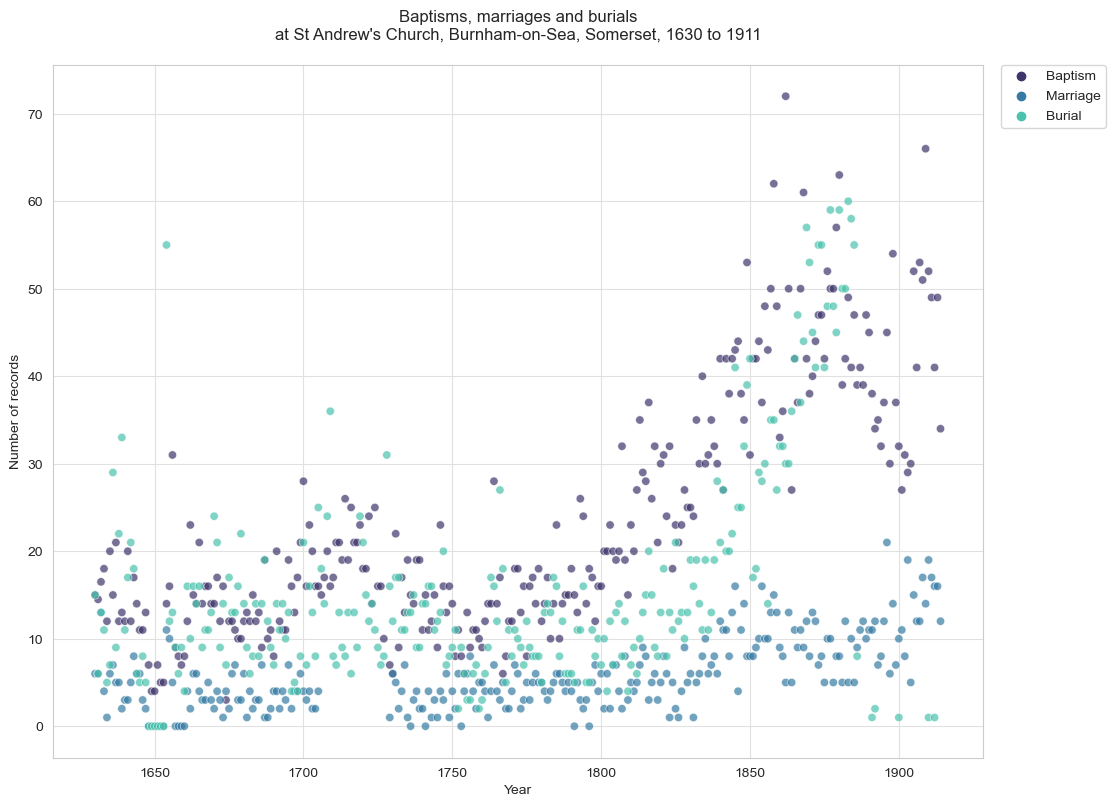

In [9]:
# Convert to long (tidy) form
df_numeric_only = df_years_only.drop(columns=['Notes', 'Census'], axis=1).copy()
dfm = df_numeric_only.melt('Year', var_name='Key', value_name='Number of records')

# Set grid style for plots
sns.set_style("whitegrid", {
    "ytick.major.size": 0.1,
    "ytick.minor.size": 0.05,
    'grid.color': 'e1e1e1'
 })

# Plot scatterplot
fig, ax = plt.subplots(figsize=(12, 9))
scatterplot = sns.scatterplot(x='Year', y='Number of records', \
                              hue='Key', data=dfm, palette='mako', alpha=0.7)
scatterplot.set_title('Baptisms, marriages and burials\nat St Andrew\'s Church, \
Burnham-on-Sea, Somerset, 1630 to 1911\n')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# Uncomment to save the figure to png
#plt.savefig('figures/scatter_all_bmd.png', dpi=300, bbox_inches='tight', \
#facecolor='w', edgecolor='w')
plt.show()

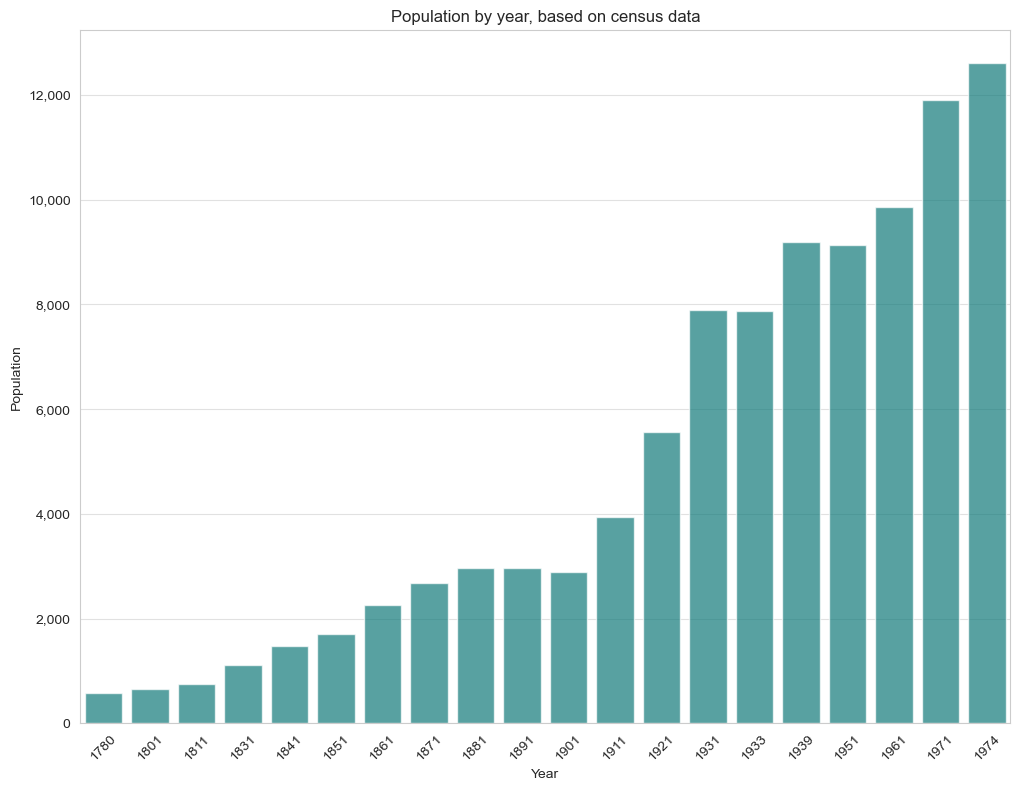

In [10]:


# Make a dataframe with only the census years
census_df = df_years_only.dropna(subset=['Census']).copy()

# Create barchart of census data
fig, ax = plt.subplots(figsize=(12, 9))
pop_chart = sns.barplot(x='Year', y='Census', data=census_df, color='darkcyan', alpha=0.7)
pop_chart.set_title('Population by year, based on census data')
pop_chart.set_xlabel('Year')
pop_chart.set_xticklabels(pop_chart.get_xticklabels(), rotation=45)
pop_chart.set_ylabel('Population')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Uncomment to save the figure to png
#plt.savefig('figures/population_barchart.png', dpi=300, bbox_inches='tight', \
#facecolor='w', edgecolor='w')
plt.show()

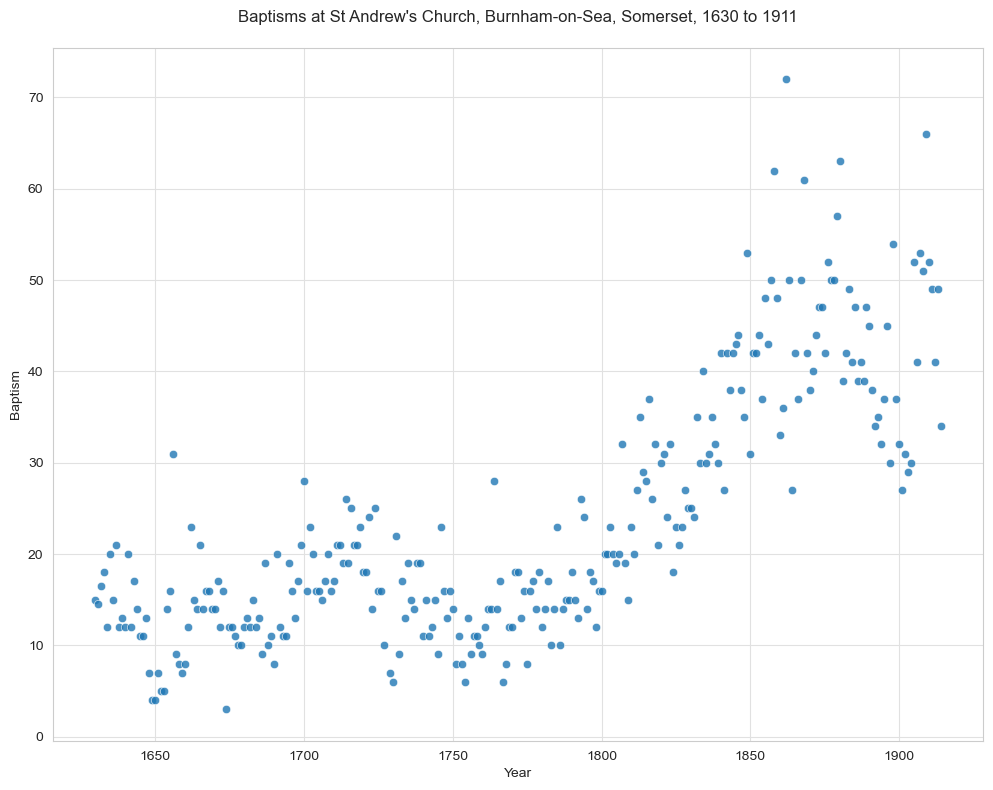

In [11]:
# Plot scatterplot of baptisms
fig, ax = plt.subplots(figsize=(12, 9))
scatterplot = sns.scatterplot(x='Year', y='Baptism', data=df_years_only, palette='mako', alpha=0.8)
scatterplot.set_title('Baptisms at St Andrew\'s Church, Burnham-on-Sea, Somerset, 1630 to 1911\n')
# Uncomment tosave the figure to png
#plt.savefig('figures/scatter_baptisms.png', dpi=300, \
#bbox_inches='tight', facecolor='w', edgecolor='w')
plt.show()

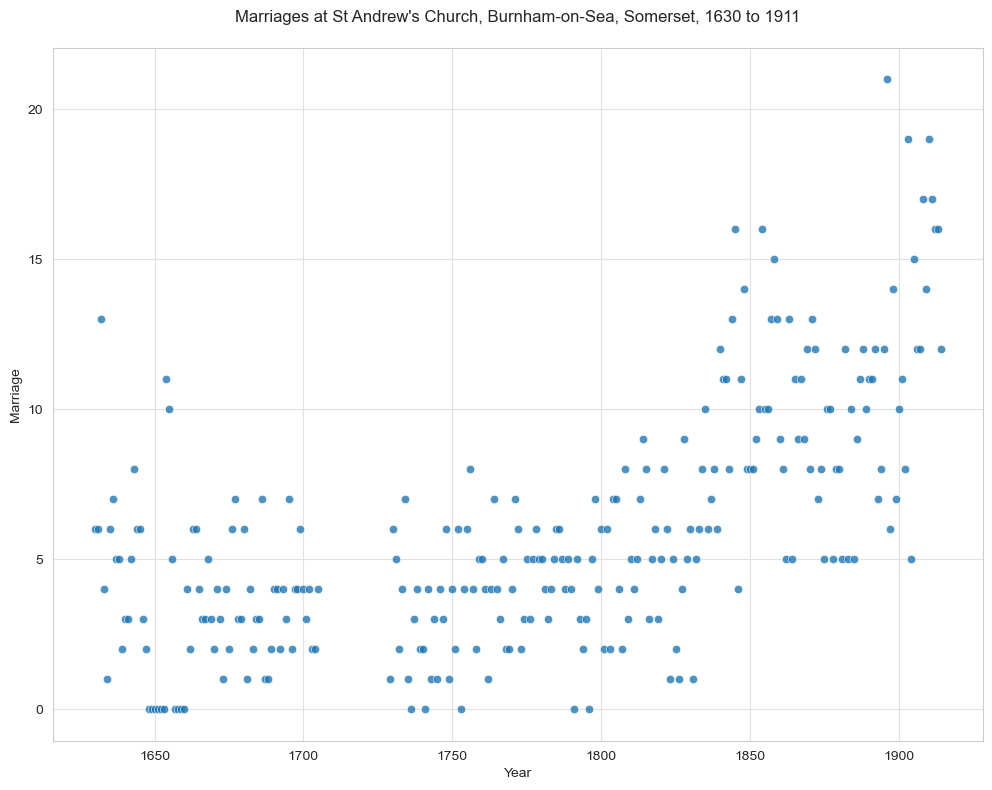

In [12]:
# Plot scatterplot of marriages
fig, ax = plt.subplots(figsize=(12, 9))
scatterplot = sns.scatterplot(x='Year', y='Marriage', data=df_years_only, palette='mako', alpha=0.8)
scatterplot.set_title('Marriages at St Andrew\'s Church, Burnham-on-Sea, Somerset, 1630 to 1911\n')
# Uncomment to save the figure to png
#plt.savefig('figures/scatter_marriages.png', dpi=300, \
#bbox_inches='tight', facecolor='w', edgecolor='w')
plt.show()

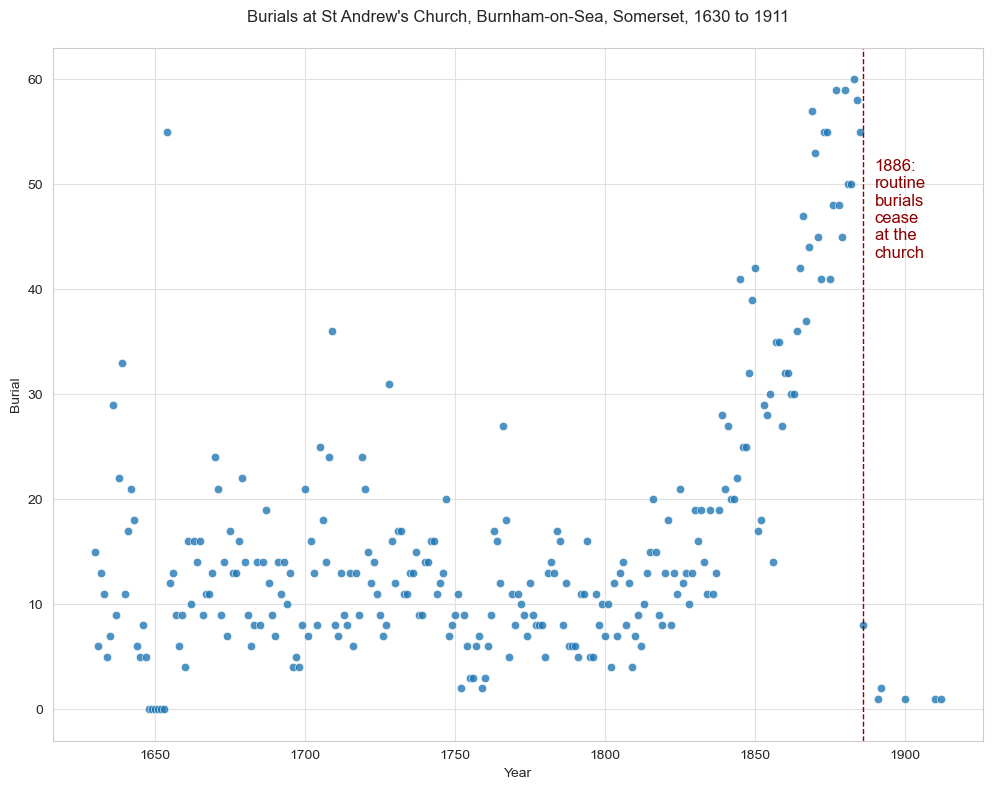

In [13]:
# Plot scatterplot of burials
fig, ax = plt.subplots(figsize=(12, 9))
scatterplot = sns.scatterplot(x='Year', y='Burial', data=df_years_only, palette='mako', alpha=0.8)
plt.axvline(1886, color='darkred', ls='--', lw=1)
plt.text(1890, 43, '1886:\nroutine\nburials\ncease\nat the\nchurch', color='darkred', fontsize=12)
scatterplot.set_title('Burials at St Andrew\'s Church, Burnham-on-Sea, Somerset, 1630 to 1911\n')
# Uncomment to save the figure to png
#plt.savefig('figures/scatter_burials.png', dpi=300, \
#bbox_inches='tight', facecolor='w', edgecolor='w')
plt.show()

### Log values or actual values?

Based on the fact that population size (and the related metrics of baptisms, marriages and burials at the church) shows close-to-exponential growth over this period, it might be sensible to visualise log values as well as actual values.

In [14]:
# Create a dataframe which includes the log value 
log_df = df_years_only.copy()
log_df['log(Baptism)'] = np.log10(log_df['Baptism'])
log_df['log(Marriage)'] = np.log10(log_df['Marriage'])
log_df['log(Burial)'] = np.log10(log_df['Burial'])
log_df['log(Census)'] = np.log10(log_df['Census'])
log_df.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Year,Baptism,Marriage,Burial,Census,Notes,log(Baptism),log(Marriage),log(Burial),log(Census)
0,1630,15.0,6.0,15.0,NaN,NaN,1.176091,0.778151,1.176091,NaN
1,1631,14.5,6.0,6.0,NaN,NaN,1.161368,0.778151,0.778151,NaN
2,1632,16.5,13.0,13.0,NaN,NaN,1.217484,1.113943,1.113943,NaN
3,1633,18.0,4.0,11.0,NaN,NaN,1.255273,0.602060,1.041393,NaN
4,1634,12.0,1.0,5.0,NaN,NaN,1.079181,0.000000,0.698970,NaN


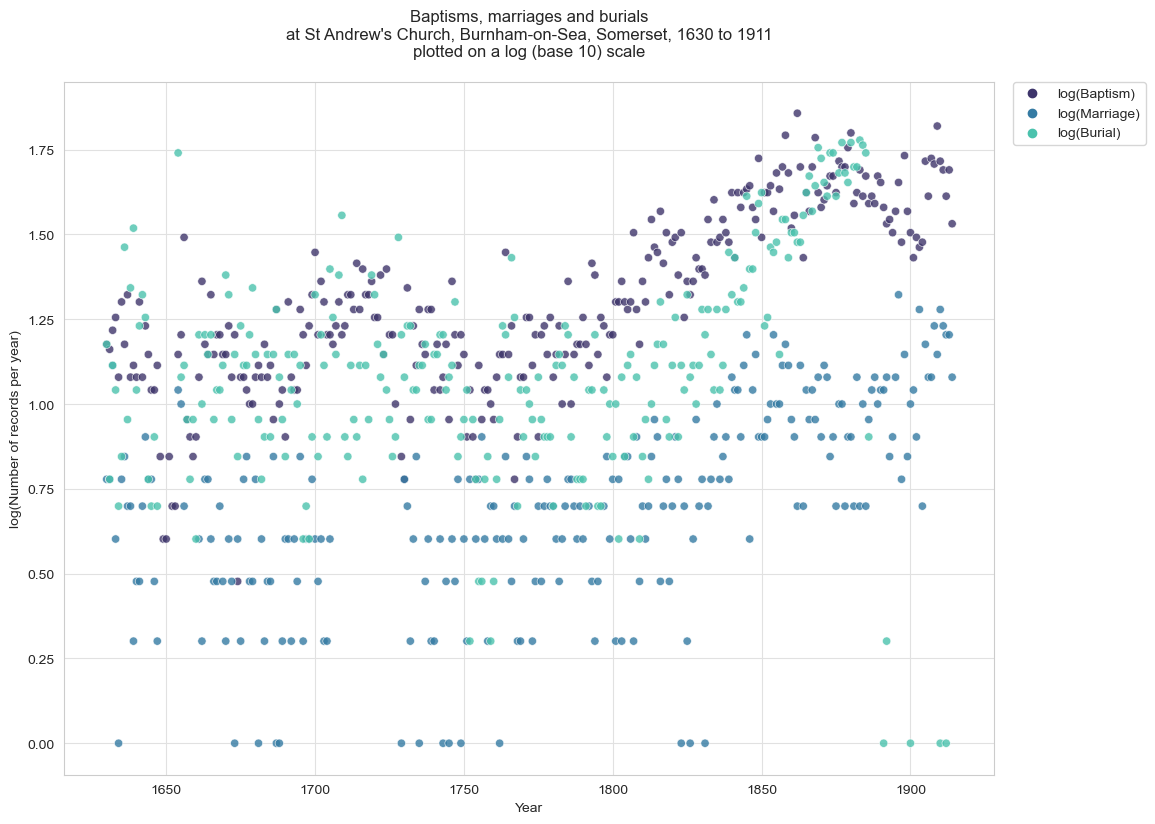

In [15]:
# Convert to long (tidy) form
log_df_2 = log_df.drop(['Baptism', 'Marriage', 'Burial', 'Census', 'log(Census)', 'Notes'], \
                       axis=1).copy()
dfm_log = log_df_2.melt('Year', var_name='Key', value_name='log(Number of records per year)')

# Plot scatterplot
fig, ax = plt.subplots(figsize=(12, 9))
log_scatter = sns.scatterplot(x='Year', y='log(Number of records per year)', \
                              hue='Key', data=dfm_log, palette='mako', alpha=0.8)
log_scatter.set_title('Baptisms, marriages and burials\nat St Andrew\'s Church, \
Burnham-on-Sea, Somerset, 1630 to 1911\nplotted on a log (base 10) scale\n')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# Uncomment to save the figure to png
#plt.savefig('figures/scatter_all_bmd_log10.png', dpi=300, \
#bbox_inches='tight', facecolor='w', edgecolor='w')
plt.show()

In [16]:
# Make a dataframe with only the census years
log_census_df = log_df.dropna(subset=['Census']).copy()
log_census_df

,Year,Baptism,Marriage,Burial,Census,Notes,log(Baptism),log(Marriage),log(Burial),log(Census)
150,1780,12.0,5.0,5.0,580.0,NaN,1.079181,0.698970,0.698970,2.763428
171,1801,20.0,2.0,10.0,653.0,NaN,1.301030,0.301030,1.000000,2.814913
181,1811,20.0,4.0,9.0,742.0,NaN,1.301030,0.602060,0.954243,2.870404
201,1831,24.0,1.0,16.0,1113.0,NaN,1.380211,0.000000,1.204120,3.046495
211,1841,27.0,11.0,27.0,1469.0,NaN,1.431364,1.041393,1.431364,3.167022
221,1851,42.0,8.0,17.0,1701.0,NaN,1.623249,0.903090,1.230449,3.230704
231,1861,36.0,8.0,32.0,2253.0,NaN,1.556303,0.903090,1.505150,3.352761
241,1871,40.0,13.0,45.0,2679.0,NaN,1.602060,1.113943,1.653213,3.427973
251,1881,39.0,5.0,50.0,2971.0,NaN,1.591065,0.698970,1.698970,3.472903
261,1891,38.0,11.0,1.0,2959.0,NaN,1.579784,1.041393,0.000000,3.471145


Now let's make regression plots of the census data, so we can see how well linear regression might fit the raw and log values.

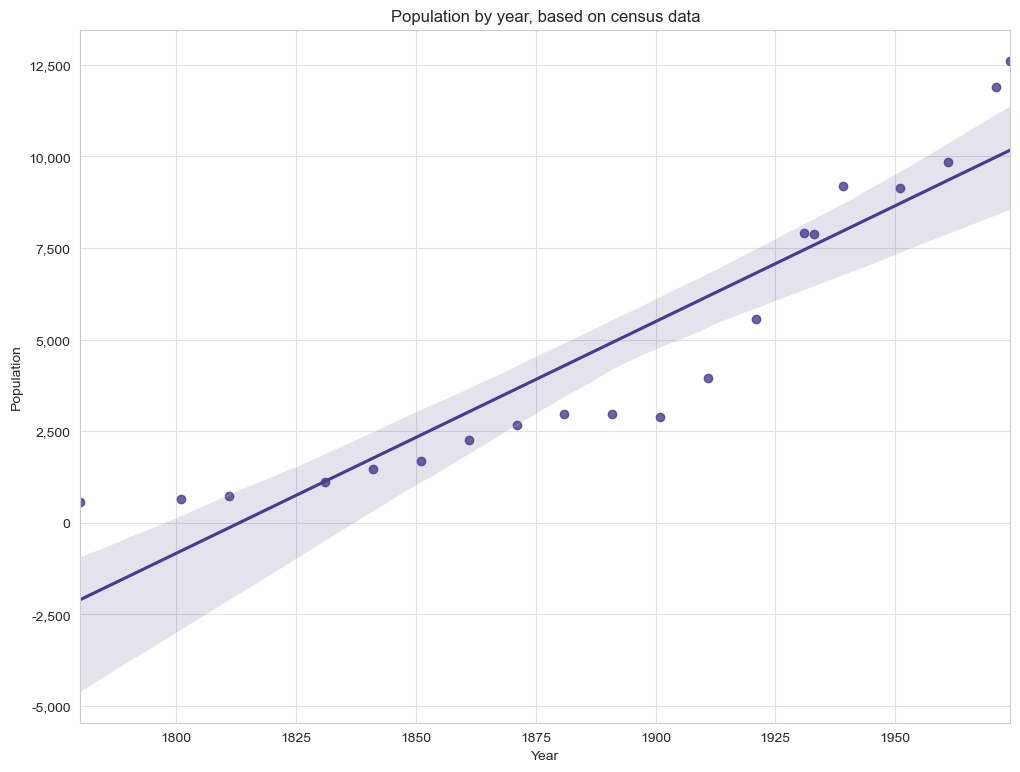

In [17]:
# Plot the raw data
# Translucent bands represent a 95% confidence interval
fig, ax = plt.subplots(figsize=(12, 9))
log_reg_plot = sns.regplot(x='Year', y='Census', data=log_census_df, \
                           marker='o', color = 'darkslateblue')
log_reg_plot.set_title('Population by year, based on census data')
log_reg_plot.set_ylabel('Population')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Uncomment to save the figure to png
#plt.savefig('figures/reg_plot_population_95ci.png', dpi=300, \
#bbox_inches='tight', facecolor='w', edgecolor='w')
plt.show()

In [ ]:
# Plot the raw data
# Translucent bands represent a 95% confidence interval
fig, ax = plt.subplots(figsize=(12, 9))
reg_plot = sns.regplot(x='Year', y='Census', data=log_census_df, marker='o', color = 'darkslateblue')
reg_plot.set_title('Population by year, based on census data')
reg_plot.set_ylabel('Population')
# save the figure to png
plt.savefig('figures/reg_plot_population_95ci.png', dpi=300, \
            bbox_inches='tight', facecolor='w', edgecolor='w')
plt.show()

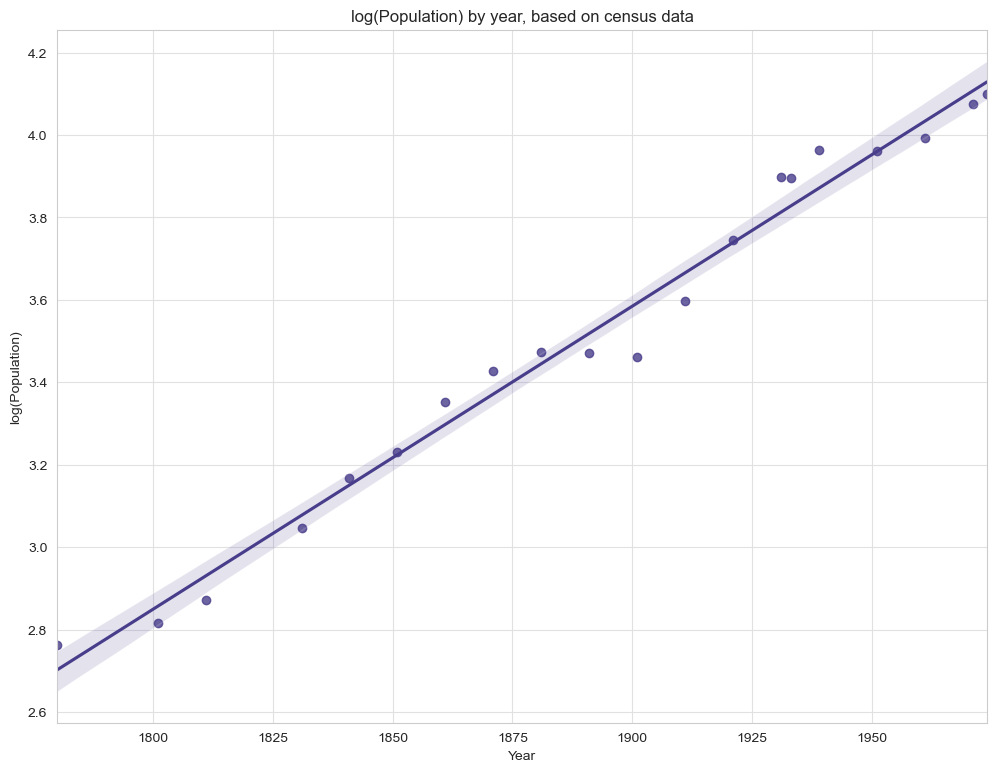

In [19]:
# Plot the log data
# Translucent bands represent a 95% confidence interval
fig, ax = plt.subplots(figsize=(12, 9))
log_reg_plot = sns.regplot(x='Year', y='log(Census)', data=log_census_df, \
                           marker='o', color = 'darkslateblue')
log_reg_plot.set_title('log(Population) by year, based on census data')
log_reg_plot.set_ylabel('log(Population)')
# Uncomment to save the figure to png
#plt.savefig('figures/reg_plot_population_95ci_log10.png', dpi=300, \
#bbox_inches='tight', facecolor='w', edgecolor='w')
plt.show()

Based on these visualisations, some observations can be made.

#### Baptisms:
- there are a few years with high outliers for baptisms, notably 1862 and 1656. 
- 1674 is a notably low year for baptisms.

#### Marriages:
- overall, marriages tend to be lower than baptisms and burials
- there is a period from 1706 to 1728 during which there is no data for marriages, which could be due to missing records
- there's a period from 1648 to 1653 when there are no marriages, which could be to do with church policy or missing records, depending on the data transciption policy

#### Burials:
- there are a few years with high outliers for burials, notably 1654. 
- other years with clear outliers for burials are: 1709, 1639, 1636, 1728 and 1766
- there's a period from 1648 to 1653 when there are no burials, which could be to do with church policy or missing records, depending on the data transciption policy
- after 1886 routine burials at the church ceased and moved to Westfield Road, and we see that the number of burials drops accordingly


It's probably also important to bear in mind that there are also social factors at play. The number of baptisms and marriages are unlikely to be exactly the same as the number of births and serious relationships in society, especially as we move in the the twentieth century, since the social expectation to baptise children and get married has decreased. Also, secular marriages are now quite common, and wouldn't be part of church records. As the UK becomes more diverse (albeit still less so in Somerset than London and other big cities), churches aren't the only religious institutions for these rites of passage. So although this data is a valuable insight into the years covered, it can't be used to make predictions or estimations about years that fall outside of the range of the dataset, especially in the 20th and 21st centuries.

---

## Bibliography

- Creighton, C *A History of Epidemics in Britain (Volume I of II) from A.D. 664 to the Extinction of Plague*. 1891. Available online (https://www.gutenberg.org/files/42686/42686-h/42686-h.htm) accessed 16/03/2022.
- Davenport, R.J., Satchell, M., Shaw-Taylor, L.M.W. 'The geography of smallpox in England before vaccination: A conundrum resolved' in *Social Science & Medicine* Volume 206, June 2018, 75-85. Available online (https://www.sciencedirect.com/science/article/pii/S0277953618301862) accessed 16/03/2022.
- Hardiman, S. *The 1832 Cholera Epidemic and its Impact on the City of Bristol*. 2005. Available online (http://www.bris.ac.uk/Depts/History/bristolrecordsociety/publications/bha114.pdf) accessed 16/03/2022.
- Shrewsbury, J.F.D. A History of Bubonic Plague in the British Isles. 1970 Cambridge: Cambridge University Press. Available online (https://www.gutenberg.org/files/42686/42686-h/42686-h.htm) accessed 16/03/2022.
- Webster, N *A brief history of epidemic and pestilential diseases; with the principal phenomena of the physical world, which precede and accompany them, and observations deduced from the facts stated. : In two volumes.* 1758-1843. Available online (https://quod.lib.umich.edu/e/evans/N27531.0001.001/1:11?rgn=div1;view=fulltext) accessed 16/03/2022.
- Williams, B. ‘The Cycles of Plague’, dissertation for a BA (Hons) degree at the University of Hull, England. 1997. Excerpt available online (https://urbanrim.org.uk/plague%20list.htm) accessed 16/03/2022.
- 'List_of_epidemics', *Wikipedia*. Available online (https://en.wikipedia.org/wiki/List_of_epidemics) accessed 16/03/2022.

## Dataset

- Wheway, A.D. (2022) *Transcription of the records of St Andrew's Church, Burnham-on-Sea, Somerset, 1630-1914' unpublished research.